<a href="https://colab.research.google.com/github/BabinRV/Dissertation/blob/main/Dissertation_TD_and_IR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch

In [ ]:
import numpy as np

In [ ]:
import torch.nn as nn

In [ ]:
import torch.nn.functional as F

In [ ]:
import pandas as pd

In [ ]:
import pandas as pd

In [ ]:
import pandas as pd
path = "/content/drive/MyDrive/Datasets/Data2006.csv"
Data2006=pd.read_csv(path)

In [ ]:
import pandas as pd
path = "/content/drive/MyDrive/Datasets/Data2007.csv"
Data2007=pd.read_csv(path)

In [ ]:
import pandas as pd
path = "/content/drive/MyDrive/Datasets/Data2008.csv"
Data2008=pd.read_csv(path)

In [ ]:
import pandas as pd
path = "/content/drive/MyDrive/Datasets/Data2009.csv"
Data2009=pd.read_csv(path)

In [ ]:
import pandas as pd
path = "/content/drive/MyDrive/Datasets/Data2010.csv"
Data2010=pd.read_csv(path)

In [ ]:
import pandas as pd
path = "/content/drive/MyDrive/Datasets/Data2011.csv"
Data2011=pd.read_csv(path)

In [ ]:
import pandas as pd
path = "/content/drive/MyDrive/Datasets/Data2012.csv"
Data2012=pd.read_csv(path)

In [ ]:
import pandas as pd
path = "/content/drive/MyDrive/Datasets/Data2101.csv"
Data2101=pd.read_csv(path)

In [ ]:
import pandas as pd
path = "/content/drive/MyDrive/Datasets/Data2102.csv"
Data2102=pd.read_csv(path)

In [ ]:
import pandas as pd
path = "/content/drive/MyDrive/Datasets/Data2206.csv"
Data2206=pd.read_csv(path)

In [ ]:
full_dataset = pd.concat([Data2006,Data2007, Data2008, Data2009, Data2010, Data2011, Data2012, Data2101, Data2102, Data2206 ])

In [ ]:
d = pd.DataFrame(full_dataset)

In [ ]:
d.to_csv('/content/drive/My Drive/full_dataset.csv', index=False)

In [ ]:
d

,avg_ipt,bytes_in,bytes_out,dest_ip,dest_port,entropy,num_pkts_out,num_pkts_in,proto,src_ip,src_port,time_end,time_start,total_entropy,label,duration
0,7.500000,342,3679,786,9200.0,5.436687,2,2,6,786,57392.0,1592533725648144,1592533725632946,21860.918000,benign,0.015198
1,0.000000,0,0,786,55972.0,0.000000,1,1,6,49453,49493.0,1592533744644904,1592533744644904,0.000000,outlier,0.000000
2,0.500000,15440,942,786,9300.0,2.203135,3,3,6,786,60512.0,1592533770936279,1592533770933553,36091.754000,benign,0.002726
3,20.217391,622,31010,786,9300.0,1.189945,23,5,6,786,60490.0,159253376770238,15925337672353,37640.355000,benign,0.467080
4,0.000000,0,0,786,59498.0,0.000000,1,1,6,786,9300.0,1592533772973114,1592533772973087,0.000000,benign,0.000027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
959879,1.400000,350,4775,786,9200.0,4.778643,5,2,6,786,49102.0,1655251172030894,165525117202365,24490.543000,benign,0.007244
959880,39.250000,188,324,786,1723.0,1.201188,6,5,6,786,57182.0,1655251171955718,1655251171706534,615.008060,outlier,0.249184
959881,227.750000,1338,8994,786,9200.0,3.681455,12,6,6,786,47232.0,1655251160941273,1655251158203952,38036.797000,benign,2.737321
959882,144.500000,12,12,786,5900.0,2.886842,5,5,6,786,40270.0,1655251162155812,1655251161718072,69.284210,outlier,0.437740


In [ ]:
import pandas as pd
path = "/content/drive/MyDrive/Datasets/full_dataset.csv"
fulldata=pd.read_csv(path)

In [ ]:
fulldata

,avg_ipt,bytes_in,bytes_out,dest_ip,dest_port,entropy,num_pkts_out,num_pkts_in,proto,src_ip,src_port,time_end,time_start,total_entropy,label,duration
0,7.500000,342,3679,786,9200.0,5.436687,2,2,6,786,57392.0,1592533725648144,1592533725632946,21860.918000,benign,0.015198
1,0.000000,0,0,786,55972.0,0.000000,1,1,6,49453,49493.0,1592533744644904,1592533744644904,0.000000,outlier,0.000000
2,0.500000,15440,942,786,9300.0,2.203135,3,3,6,786,60512.0,1592533770936279,1592533770933553,36091.754000,benign,0.002726
3,20.217391,622,31010,786,9300.0,1.189945,23,5,6,786,60490.0,159253376770238,15925337672353,37640.355000,benign,0.467080
4,0.000000,0,0,786,59498.0,0.000000,1,1,6,786,9300.0,1592533772973114,1592533772973087,0.000000,benign,0.000027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192198792,1.400000,350,4775,786,9200.0,4.778643,5,2,6,786,49102.0,1655251172030894,165525117202365,24490.543000,benign,0.007244
192198793,39.250000,188,324,786,1723.0,1.201188,6,5,6,786,57182.0,1655251171955718,1655251171706534,615.008060,outlier,0.249184
192198794,227.750000,1338,8994,786,9200.0,3.681455,12,6,6,786,47232.0,1655251160941273,1655251158203952,38036.797000,benign,2.737321
192198795,144.500000,12,12,786,5900.0,2.886842,5,5,6,786,40270.0,1655251162155812,1655251161718072,69.284210,outlier,0.437740


In [ ]:
fulldata['label'] = fulldata['label'].replace('benign', 0.0)
fulldata['label'] = fulldata['label'].replace('outlier', 0.5)
fulldata['label'] = fulldata['label'].replace('malicious', 1.0)

<ipython-input-3-c23a380439ab>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fulldata['label'] = fulldata['label'].replace('malicious', 1.0)


In [ ]:
fulldata

,avg_ipt,bytes_in,bytes_out,dest_ip,dest_port,entropy,num_pkts_out,num_pkts_in,proto,src_ip,src_port,time_end,time_start,total_entropy,label,duration
0,7.500000,342,3679,786,9200.0,5.436687,2,2,6,786,57392.0,1592533725648144,1592533725632946,21860.918000,0.0,0.015198
1,0.000000,0,0,786,55972.0,0.000000,1,1,6,49453,49493.0,1592533744644904,1592533744644904,0.000000,0.5,0.000000
2,0.500000,15440,942,786,9300.0,2.203135,3,3,6,786,60512.0,1592533770936279,1592533770933553,36091.754000,0.0,0.002726
3,20.217391,622,31010,786,9300.0,1.189945,23,5,6,786,60490.0,159253376770238,15925337672353,37640.355000,0.0,0.467080
4,0.000000,0,0,786,59498.0,0.000000,1,1,6,786,9300.0,1592533772973114,1592533772973087,0.000000,0.0,0.000027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192198792,1.400000,350,4775,786,9200.0,4.778643,5,2,6,786,49102.0,1655251172030894,165525117202365,24490.543000,0.0,0.007244
192198793,39.250000,188,324,786,1723.0,1.201188,6,5,6,786,57182.0,1655251171955718,1655251171706534,615.008060,0.5,0.249184
192198794,227.750000,1338,8994,786,9200.0,3.681455,12,6,6,786,47232.0,1655251160941273,1655251158203952,38036.797000,0.0,2.737321
192198795,144.500000,12,12,786,5900.0,2.886842,5,5,6,786,40270.0,1655251162155812,1655251161718072,69.284210,0.5,0.437740


In [ ]:
import numpy as np

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
data_normalized = scaler.fit_transform(fulldata)

In [ ]:
import numpy as np

In [ ]:
features = data_normalized
features_2d = features.reshape(-1, 4, 4, 1)

In [ ]:
fulldata.head()

,avg_ipt,bytes_in,bytes_out,dest_ip,dest_port,entropy,num_pkts_out,num_pkts_in,proto,src_ip,src_port,time_end,time_start,total_entropy,label,duration
0,7.500000,342,3679,786,9200.0,5.436687,2,2,6,786,57392.0,1592533725648144,1592533725632946,21860.918,0.0,0.015198
1,0.000000,0,0,786,55972.0,0.000000,1,1,6,49453,49493.0,1592533744644904,1592533744644904,0.000,0.5,0.000000
2,0.500000,15440,942,786,9300.0,2.203135,3,3,6,786,60512.0,1592533770936279,1592533770933553,36091.754,0.0,0.002726
3,20.217391,622,31010,786,9300.0,1.189945,23,5,6,786,60490.0,159253376770238,15925337672353,37640.355,0.0,0.467080
4,0.000000,0,0,786,59498.0,0.000000,1,1,6,786,9300.0,1592533772973114,1592533772973087,0.000,0.0,0.000027


In [ ]:
fulldata

,avg_ipt,bytes_in,bytes_out,dest_ip,dest_port,entropy,num_pkts_out,num_pkts_in,proto,src_ip,src_port,time_end,time_start,total_entropy,label,duration
0,7.500000,342,3679,786,9200.0,5.436687,2,2,6,786,57392.0,1592533725648144,1592533725632946,21860.918000,0.0,0.015198
1,0.000000,0,0,786,55972.0,0.000000,1,1,6,49453,49493.0,1592533744644904,1592533744644904,0.000000,0.5,0.000000
2,0.500000,15440,942,786,9300.0,2.203135,3,3,6,786,60512.0,1592533770936279,1592533770933553,36091.754000,0.0,0.002726
3,20.217391,622,31010,786,9300.0,1.189945,23,5,6,786,60490.0,159253376770238,15925337672353,37640.355000,0.0,0.467080
4,0.000000,0,0,786,59498.0,0.000000,1,1,6,786,9300.0,1592533772973114,1592533772973087,0.000000,0.0,0.000027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192198792,1.400000,350,4775,786,9200.0,4.778643,5,2,6,786,49102.0,1655251172030894,165525117202365,24490.543000,0.0,0.007244
192198793,39.250000,188,324,786,1723.0,1.201188,6,5,6,786,57182.0,1655251171955718,1655251171706534,615.008060,0.5,0.249184
192198794,227.750000,1338,8994,786,9200.0,3.681455,12,6,6,786,47232.0,1655251160941273,1655251158203952,38036.797000,0.0,2.737321
192198795,144.500000,12,12,786,5900.0,2.886842,5,5,6,786,40270.0,1655251162155812,1655251161718072,69.284210,0.5,0.437740


In [ ]:
import pandas as pd
path = "/content/drive/MyDrive/Datasets/full_dataset.csv"
fulldata=pd.read_csv(path)

In [ ]:
fulldata['label'] = fulldata['label'].replace('benign', 0.0)
fulldata['label'] = fulldata['label'].replace('outlier', 0.5)
fulldata['label'] = fulldata['label'].replace('malicious', 1.0)
fulldata.head()

<ipython-input-3-7cf785299dc0>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fulldata['label'] = fulldata['label'].replace('malicious', 1.0)


,avg_ipt,bytes_in,bytes_out,dest_ip,dest_port,entropy,num_pkts_out,num_pkts_in,proto,src_ip,src_port,time_end,time_start,total_entropy,label,duration
0,7.500000,342,3679,786,9200.0,5.436687,2,2,6,786,57392.0,1592533725648144,1592533725632946,21860.918,0.0,0.015198
1,0.000000,0,0,786,55972.0,0.000000,1,1,6,49453,49493.0,1592533744644904,1592533744644904,0.000,0.5,0.000000
2,0.500000,15440,942,786,9300.0,2.203135,3,3,6,786,60512.0,1592533770936279,1592533770933553,36091.754,0.0,0.002726
3,20.217391,622,31010,786,9300.0,1.189945,23,5,6,786,60490.0,159253376770238,15925337672353,37640.355,0.0,0.467080
4,0.000000,0,0,786,59498.0,0.000000,1,1,6,786,9300.0,1592533772973114,1592533772973087,0.000,0.0,0.000027


In [ ]:
column_name1 = 'label'
column_name2 = 'duration'
fulldata[[column_name1, column_name2]] = fulldata[[column_name2, column_name1]]

In [ ]:
fulldata.head()

,avg_ipt,bytes_in,bytes_out,dest_ip,dest_port,entropy,num_pkts_out,num_pkts_in,proto,src_ip,src_port,time_end,time_start,total_entropy,label,duration
0,7.500000,342,3679,786,9200.0,5.436687,2,2,6,786,57392.0,1592533725648144,1592533725632946,21860.918,0.015198,0.0
1,0.000000,0,0,786,55972.0,0.000000,1,1,6,49453,49493.0,1592533744644904,1592533744644904,0.000,0.000000,0.5
2,0.500000,15440,942,786,9300.0,2.203135,3,3,6,786,60512.0,1592533770936279,1592533770933553,36091.754,0.002726,0.0
3,20.217391,622,31010,786,9300.0,1.189945,23,5,6,786,60490.0,159253376770238,15925337672353,37640.355,0.467080,0.0
4,0.000000,0,0,786,59498.0,0.000000,1,1,6,786,9300.0,1592533772973114,1592533772973087,0.000,0.000027,0.0


In [ ]:
fulldata.head()

,avg_ipt,bytes_in,bytes_out,dest_ip,dest_port,entropy,num_pkts_out,num_pkts_in,proto,src_ip,src_port,time_end,time_start,total_entropy,label,add_column,duration
0,7.500000,342,3679,786,9200.0,5.436687,2,2,6,786,57392.0,1592533725648144,1592533725632946,21860.918,0.015198,0,0.0
1,0.000000,0,0,786,55972.0,0.000000,1,1,6,49453,49493.0,1592533744644904,1592533744644904,0.000,0.000000,0,0.5
2,0.500000,15440,942,786,9300.0,2.203135,3,3,6,786,60512.0,1592533770936279,1592533770933553,36091.754,0.002726,0,0.0
3,20.217391,622,31010,786,9300.0,1.189945,23,5,6,786,60490.0,159253376770238,15925337672353,37640.355,0.467080,0,0.0
4,0.000000,0,0,786,59498.0,0.000000,1,1,6,786,9300.0,1592533772973114,1592533772973087,0.000,0.000027,0,0.0


In [ ]:
fulldata.shape

(192198797, 17)

In [ ]:
import pandas as pd
fulldata = pd.read_csv('/content/drive/MyDrive/Datasets/full_dataset.csv')

In [ ]:
unique_labels = fulldata['label'].unique()
print(f"Unique values in 'label' column: {unique_labels}")

Unique values in 'label' column: [1.5198000e-02 0.0000000e+00 2.7260000e-03 ... 6.1444600e+00 1.3829583e+01
 2.1095894e+01]


In [ ]:
fulldata.head()

,avg_ipt,bytes_in,bytes_out,dest_ip,dest_port,entropy,num_pkts_out,num_pkts_in,proto,src_ip,src_port,time_end,time_start,total_entropy,label,add_column,duration
0,7.500000,342,3679,786,9200.0,5.436687,2,2,6,786,57392.0,1592533725648144,1592533725632946,21860.918,0.015198,0,0.0
1,0.000000,0,0,786,55972.0,0.000000,1,1,6,49453,49493.0,1592533744644904,1592533744644904,0.000,0.000000,0,0.5
2,0.500000,15440,942,786,9300.0,2.203135,3,3,6,786,60512.0,1592533770936279,1592533770933553,36091.754,0.002726,0,0.0
3,20.217391,622,31010,786,9300.0,1.189945,23,5,6,786,60490.0,159253376770238,15925337672353,37640.355,0.467080,0,0.0
4,0.000000,0,0,786,59498.0,0.000000,1,1,6,786,9300.0,1592533772973114,1592533772973087,0.000,0.000027,0,0.0


In [ ]:
fulldata.rename(columns={'duration': 'label1'}, inplace=True)

In [ ]:
fulldata.rename(columns={'label': 'duration'}, inplace=True)

In [ ]:
fulldata.rename(columns={'label1': 'label'}, inplace=True)

In [ ]:
fulldata.head()

,avg_ipt,bytes_in,bytes_out,dest_ip,dest_port,entropy,num_pkts_out,num_pkts_in,proto,src_ip,src_port,time_end,time_start,total_entropy,duration,add_column,label
0,7.500000,342,3679,786,9200.0,5.436687,2,2,6,786,57392.0,1592533725648144,1592533725632946,21860.918,0.015198,0,0.0
1,0.000000,0,0,786,55972.0,0.000000,1,1,6,49453,49493.0,1592533744644904,1592533744644904,0.000,0.000000,0,0.5
2,0.500000,15440,942,786,9300.0,2.203135,3,3,6,786,60512.0,1592533770936279,1592533770933553,36091.754,0.002726,0,0.0
3,20.217391,622,31010,786,9300.0,1.189945,23,5,6,786,60490.0,159253376770238,15925337672353,37640.355,0.467080,0,0.0
4,0.000000,0,0,786,59498.0,0.000000,1,1,6,786,9300.0,1592533772973114,1592533772973087,0.000,0.000027,0,0.0


In [ ]:
unique_labels = fulldata['label'].unique()
print(f"Unique values in 'label' column: {unique_labels}")

Unique values in 'label' column: [0.  0.5 1. ]


In [ ]:
target_column = 'label'
X = fulldata.drop(columns=[target_column]).values
y = fulldata[target_column].values

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [ ]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
y = to_categorical(y)

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
X = X.reshape(-1, 4, 4, 1)

In [ ]:
print (X[14])

[[[-0.04167832]
  [-0.19751279]
  [-0.47128948]
  [-0.13746269]]

 [[ 2.62132125]
  [-1.37908547]
  [-0.28062402]
  [-0.20670841]]

 [[-0.16122516]
  [-0.37573787]
  [-1.51820812]
  [ 0.30944666]]

 [[-2.96731932]
  [-0.27641799]
  [-0.18515947]
  [ 0.        ]]]


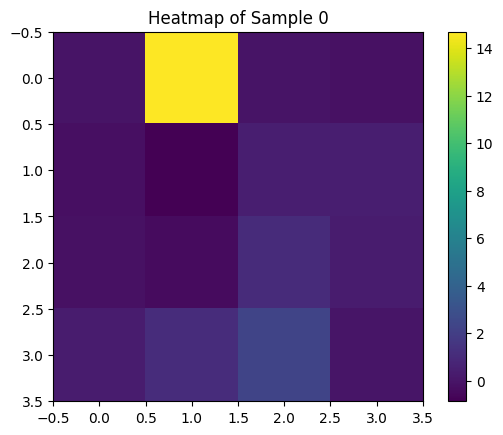

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(X[35].squeeze(), cmap='viridis')
plt.colorbar()
plt.title("Heatmap of Sample 0")
plt.show()


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(4, 4, 1)),
    MaxPooling2D((2, 2)),
    Dropout(0.2),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(y.shape[1], activation='softmax')
])

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
3843976/3843976 [==============================] - 7670s 2ms/step - loss: 0.2606 - accuracy: 0.8841 - val_loss: 0.2425 - val_accuracy: 0.8811
Epoch 2/10
3843976/3843976 [==============================] - 7644s 2ms/step - loss: 0.2558 - accuracy: 0.8854 - val_loss: 0.2405 - val_accuracy: 0.8841
Epoch 3/10
3843976/3843976 [==============================] - 7682s 2ms/step - loss: 0.2552 - accuracy: 0.8857 - val_loss: 0.2405 - val_accuracy: 0.8832
Epoch 4/10
3843976/3843976 [==============================] - 7668s 2ms/step - loss: 0.2557 - accuracy: 0.8858 - val_loss: 0.2390 - val_accuracy: 0.8850
Epoch 5/10
3843976/3843976 [==============================] - 7641s 2ms/step - loss: 0.2542 - accuracy: 0.8859 - val_loss: 0.2390 - val_accuracy: 0.8844
Epoch 6/10
3843976/3843976 [==============================] - 7702s 2ms/step - loss: 0.2540 - accuracy: 0.8862 - val_loss: 0.2389 - val_accuracy: 0.8835
Epoch 7/10
3843976/3843976 [==============================] - 7687s 2ms/step - los

In [ ]:
import pandas as pd
fulldata = pd.read_csv('/content/drive/MyDrive/Datasets/full_dataset.csv')

In [ ]:
fulldata.rename(columns={'duration': 'label1'}, inplace=True)
fulldata.rename(columns={'label': 'duration'}, inplace=True)
fulldata.rename(columns={'label1': 'label'}, inplace=True)

In [ ]:
unique_labels = fulldata['label'].unique()
print(f"Unique values in 'label' column: {unique_labels}")

Unique values in 'label' column: [0.  0.5 1. ]


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [ ]:
import pandas as pd
fulldata = pd.read_csv('/content/drive/MyDrive/Datasets/full_dataset.csv')

In [ ]:
fulldata.rename(columns={'duration': 'label1'}, inplace=True)
fulldata.rename(columns={'label': 'duration'}, inplace=True)
fulldata.rename(columns={'label1': 'label'}, inplace=True)

In [ ]:
unique_labels = fulldata['label'].unique()
print(f"Unique values in 'label' column: {unique_labels}")

Unique values in 'label' column: [0.  0.5 1. ]


In [ ]:
target_column = 'label'
X = fulldata.drop(columns=[target_column]).values
y = fulldata[target_column].values

In [ ]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
y = to_categorical(y)

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
X = X.reshape(-1, 4, 4, 1)

In [ ]:
print (X.shape)
print (X[14])

(192198797, 4, 4, 1)
[[[-0.04167832]
  [-0.19751279]
  [-0.47128948]
  [-0.13746269]]

 [[ 2.62132125]
  [-1.37908547]
  [-0.28062402]
  [-0.20670841]]

 [[-0.16122516]
  [-0.37573787]
  [-1.51820812]
  [ 0.30944666]]

 [[-2.96731932]
  [-0.27641799]
  [-0.18515947]
  [ 0.        ]]]


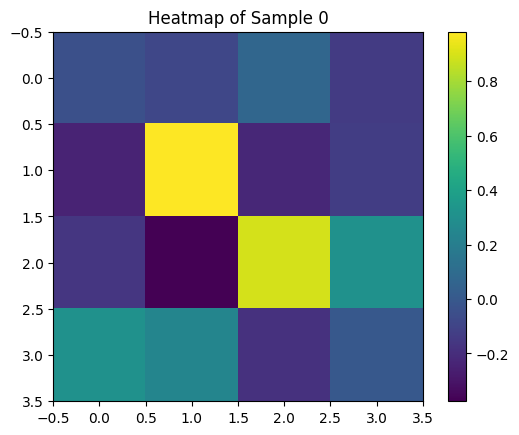

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(X[0].squeeze(), cmap='viridis')
plt.colorbar()
plt.title("Heatmap of Sample 0")
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(4, 4, 1)),
    MaxPooling2D((2, 2)),
    Dropout(0.2),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(y.shape[1], activation='softmax')
])

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
checkpoint = tf.keras.callbacks.ModelCheckpoint(
    'cnn_model_checkpoint.h5', save_weights_only=True, save_best_only=True, verbose=1
)

In [ ]:
history = model.fit(X_train, y_train, epochs=8, batch_size=32, validation_split=0.2)

Epoch 1/8
3843976/3843976 [==============================] - 7519s 2ms/step - loss: 0.2618 - accuracy: 0.8839 - val_loss: 0.2445 - val_accuracy: 0.8799
Epoch 2/8
3843976/3843976 [==============================] - 7518s 2ms/step - loss: 0.2567 - accuracy: 0.8850 - val_loss: 0.2416 - val_accuracy: 0.8819
Epoch 3/8
3843976/3843976 [==============================] - 7534s 2ms/step - loss: 0.2545 - accuracy: 0.8855 - val_loss: 0.2424 - val_accuracy: 0.8794
Epoch 4/8
3843976/3843976 [==============================] - 7523s 2ms/step - loss: 0.2542 - accuracy: 0.8858 - val_loss: 0.2415 - val_accuracy: 0.8831
Epoch 5/8
3843976/3843976 [==============================] - 7514s 2ms/step - loss: 0.2541 - accuracy: 0.8859 - val_loss: 0.2412 - val_accuracy: 0.8827
Epoch 6/8
3843976/3843976 [==============================] - 7501s 2ms/step - loss: 0.2542 - accuracy: 0.8861 - val_loss: 0.2413 - val_accuracy: 0.8837
Epoch 7/8
3843976/3843976 [==============================] - 7525s 2ms/step - loss: 0.25

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

1201243/1201243 [==============================] - 1567s 1ms/step - loss: 0.2415 - accuracy: 0.8821
Test Accuracy: 88.21%


In [ ]:
model.save('cnn_16_columns_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

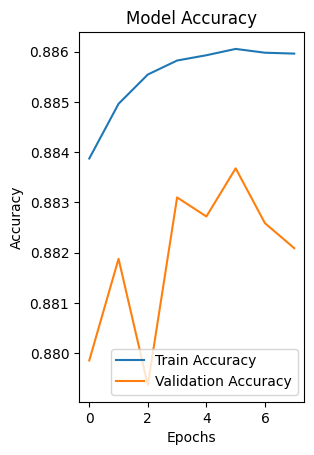

In [ ]:
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

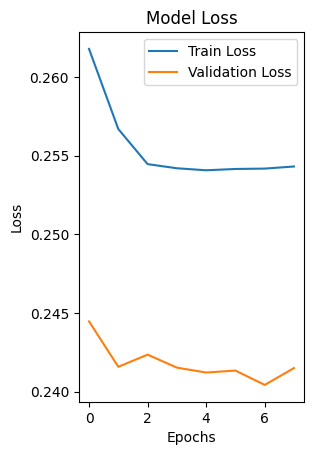

In [ ]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [ ]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

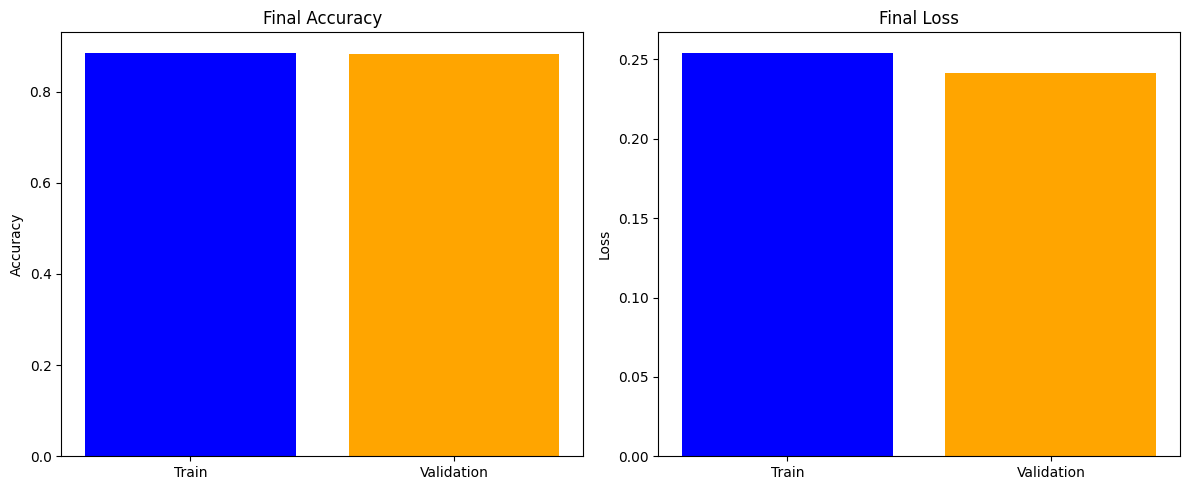

In [ ]:
# Display performance metrics as bar charts
metrics = ['Accuracy', 'Loss']
values = [
    [history.history['accuracy'][-1], history.history['val_accuracy'][-1]],  # Final train and validation accuracy
    [history.history['loss'][-1], history.history['val_loss'][-1]]           # Final train and validation loss
]

# Create bar charts
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Accuracy bar chart
ax[0].bar(['Train', 'Validation'], values[0], color=['blue', 'orange'])
ax[0].set_title('Final Accuracy')
ax[0].set_ylabel('Accuracy')

# Loss bar chart
ax[1].bar(['Train', 'Validation'], values[1], color=['blue', 'orange'])
ax[1].set_title('Final Loss')
ax[1].set_ylabel('Loss')

plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

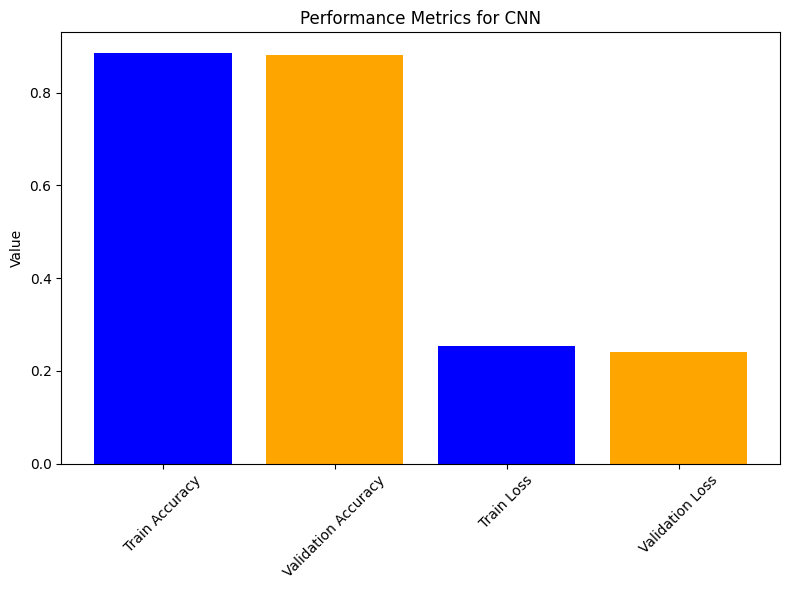

In [ ]:
# Loss bar chart
ax[1].bar(['Train', 'Validation'], values[1], color=['blue', 'orange'])
ax[1].set_title('Final Loss')
ax[1].set_ylabel('Loss')

plt.tight_layout()
plt.show()

# Create an additional bar graph for both metrics
metrics_combined = ['Train Accuracy', 'Validation Accuracy', 'Train Loss', 'Validation Loss']
values_combined = [
    history.history['accuracy'][-1],
    history.history['val_accuracy'][-1],
    history.history['loss'][-1],
    history.history['val_loss'][-1]
]

plt.figure(figsize=(8, 6))
plt.bar(metrics_combined, values_combined, color=['blue', 'orange', 'blue', 'orange'])
plt.title('Performance Metrics for CNN')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
X = X.reshape(-1, X.shape[-1])

In [ ]:
print (X.shape)
print (X[14])

(3075180752, 1)
[-0.18261289]


In [ ]:
fulldata.head()

,avg_ipt,bytes_in,bytes_out,dest_ip,dest_port,entropy,num_pkts_out,num_pkts_in,proto,src_ip,src_port,time_end,time_start,total_entropy,duration,add_column,label
0,7.500000,342,3679,786,9200.0,5.436687,2,2,6,786,57392.0,1592533725648144,1592533725632946,21860.918,0.015198,0,0.0
1,0.000000,0,0,786,55972.0,0.000000,1,1,6,49453,49493.0,1592533744644904,1592533744644904,0.000,0.000000,0,0.5
2,0.500000,15440,942,786,9300.0,2.203135,3,3,6,786,60512.0,1592533770936279,1592533770933553,36091.754,0.002726,0,0.0
3,20.217391,622,31010,786,9300.0,1.189945,23,5,6,786,60490.0,159253376770238,15925337672353,37640.355,0.467080,0,0.0
4,0.000000,0,0,786,59498.0,0.000000,1,1,6,786,9300.0,1592533772973114,1592533772973087,0.000,0.000027,0,0.0


In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd
fulldata = pd.read_csv('/content/drive/MyDrive/Datasets/full_dataset.csv')

In [ ]:
fulldata.rename(columns={'duration': 'label1'}, inplace=True)
fulldata.rename(columns={'label': 'duration'}, inplace=True)
fulldata.rename(columns={'label1': 'label'}, inplace=True)


In [ ]:
unique_labels = fulldata['label'].unique()
print(f"Unique values in 'label' column: {unique_labels}")

Unique values in 'label' column: [0.  0.5 1. ]


In [ ]:
target_column = 'label'
X = fulldata.drop(columns=[target_column]).values
y = fulldata[target_column].values

In [ ]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
rf_model = RandomForestClassifier(n_estimators=10, random_state=42)


In [ ]:
import time
start_time = time.time()
rf_model.fit(X_train, y_train)
end_time = time.time()

In [ ]:
training_time = end_time - start_time
print(f"Model training completed in {training_time:.2f} seconds.")

Model training completed in 19818.65 seconds.


Train Accuracy: 99.88%
Test Accuracy: 99.49%

Classification Report (Test Data):

              precision    recall  f1-score   support

           0       1.00      1.00      1.00  21216207
           1       0.98      0.98      0.98   4699292
           2       0.99      0.99      0.99  12524261

    accuracy                           0.99  38439760
   macro avg       0.99      0.99      0.99  38439760
weighted avg       0.99      0.99      0.99  38439760



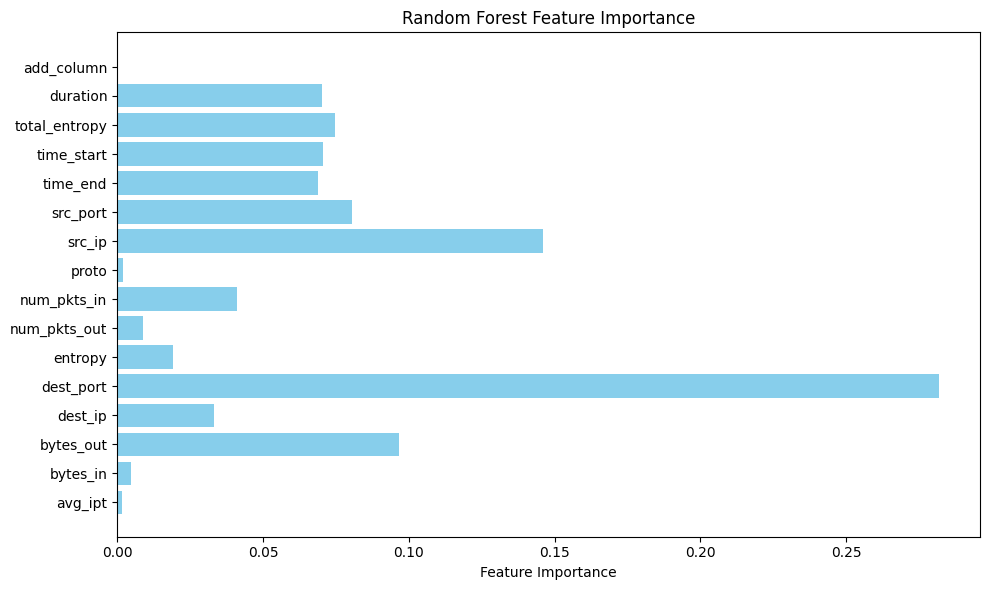

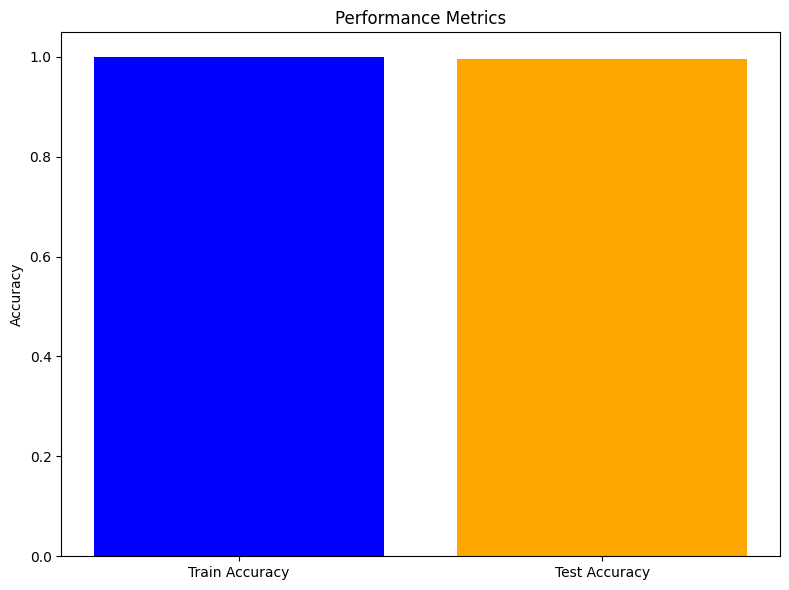

In [ ]:
# Make predictions
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

# Evaluate the model
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Train Accuracy: {train_accuracy * 100:.2f}%")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

print("\nClassification Report (Test Data):\n")
print(classification_report(y_test, y_test_pred))

# Feature Importance
feature_importances = rf_model.feature_importances_
feature_names = fulldata.drop(columns=[target_column]).columns

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importances, color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importance')
plt.tight_layout()
plt.show()

# Display performance metrics as bar charts
metrics = ['Train Accuracy', 'Test Accuracy']
values = [train_accuracy, test_accuracy]

plt.figure(figsize=(8, 6))
plt.bar(metrics, values, color=['blue', 'orange'])
plt.title('Performance Metrics')
plt.ylabel('Accuracy')
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt
import time

# Load your dataset
# Replace 'your_dataset.csv' with your actual dataset path
import pandas as pd
fulldata = pd.read_csv('/content/drive/MyDrive/Datasets/full_dataset.csv')

In [ ]:
fulldata.rename(columns={'duration': 'label1'}, inplace=True)
fulldata.rename(columns={'label': 'duration'}, inplace=True)
fulldata.rename(columns={'label1': 'label'}, inplace=True)

In [ ]:
# View unique values in a specific column, e.g., 'label'
unique_labels = fulldata['label'].unique()
print(f"Unique values in 'label' column: {unique_labels}")

Unique values in 'label' column: [0.  0.5 1. ]


In [ ]:
# Assuming the last column is the target variable
target_column = 'label'
X = fulldata.drop(columns=[target_column]).values
y = fulldata[target_column].values

# Encode target labels if they are categorical
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [ ]:
# Standardize the feature values
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Build the Multilayer Perceptron (MLP) model
mlp_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid') # Change to softmax for multi-class classification
])

mlp_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model with timing
start_time = time.time()
history = mlp_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=8, batch_size=32, verbose=1)
end_time = time.time()

# Calculate and display training time
training_time = end_time - start_time
print(f"Model training completed in {training_time:.2f} seconds.")

Epoch 1/8
4804970/4804970 [==============================] - 9463s 2ms/step - loss: -52614934822912.0000 - accuracy: 0.4819 - val_loss: -210843199340544.0000 - val_accuracy: 0.4746
Epoch 2/8
4804970/4804970 [==============================] - 9455s 2ms/step - loss: -831337829236736.0000 - accuracy: 0.4742 - val_loss: -1809748223590400.0000 - val_accuracy: 0.4732
Epoch 3/8
4804970/4804970 [==============================] - 9505s 2ms/step - loss: -3881111226679296.0000 - accuracy: 0.4738 - val_loss: -6661890486829056.0000 - val_accuracy: 0.4731
Epoch 4/8
4804970/4804970 [==============================] - 9508s 2ms/step - loss: -10750988189171712.0000 - accuracy: 0.4744 - val_loss: -14297292219613184.0000 - val_accuracy: 0.4763
Epoch 5/8
3901051/4804970 [=======================>......] - ETA: 25:56 - loss: -16309043089899520.0000 - accuracy: 0.4771

In [ ]:
import pandas as pd
fulldata = pd.read_csv('/content/drive/MyDrive/Datasets/full_dataset.csv')

In [ ]:
fulldata.rename(columns={'duration': 'label1'}, inplace=True)
fulldata.rename(columns={'label': 'duration'}, inplace=True)
fulldata.rename(columns={'label1': 'label'}, inplace=True)

In [ ]:
unique_labels = fulldata['label'].unique()
print(f"Unique values in 'label' column: {unique_labels}")

Unique values in 'label' column: [0.  0.5 1. ]


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt
import time

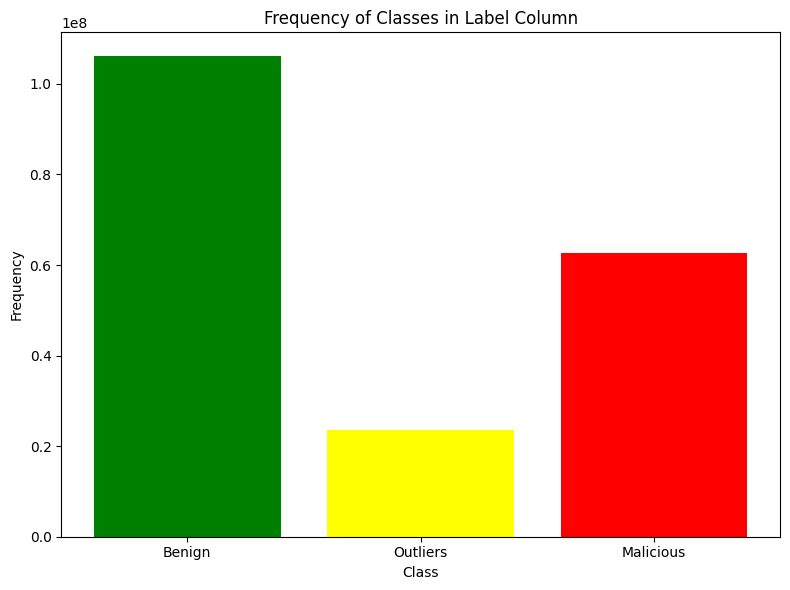

In [ ]:
categories = ['Benign', 'Outliers', 'Malicious']
counts = [sum(fulldata['label'] == 0.0), sum(fulldata['label'] == 0.5), sum(fulldata['label'] == 1.0)]

plt.figure(figsize=(8, 6))
plt.bar(categories, counts, color=['green', 'yellow', 'red'])
plt.title('Frequency of Classes in Label Column')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

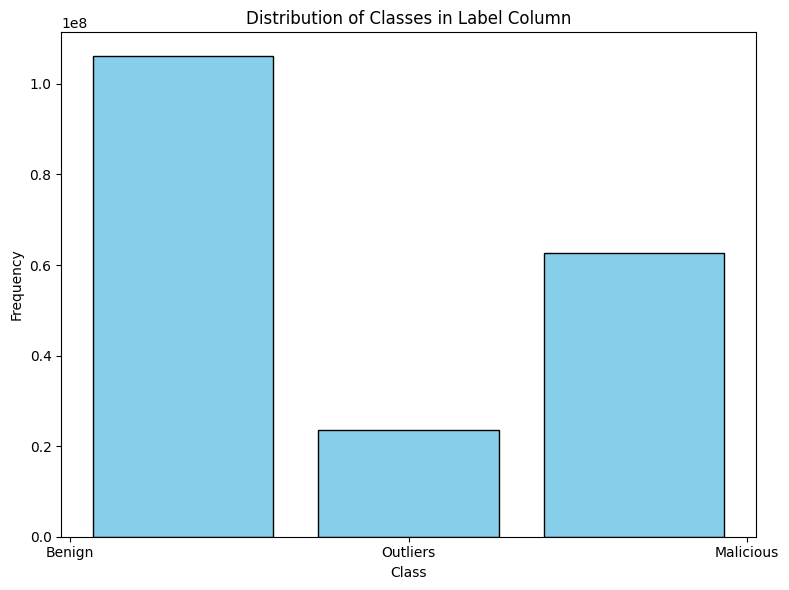

In [ ]:
# Histogram for categorical data in the 'label' column
plt.figure(figsize=(8, 6))
plt.hist(fulldata['label'], bins=3, color='skyblue', edgecolor='black', rwidth=0.8)
plt.title('Distribution of Classes in Label Column')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks([0.0, 0.5, 1.0], ['Benign', 'Outliers', 'Malicious'])
plt.tight_layout()
plt.show()

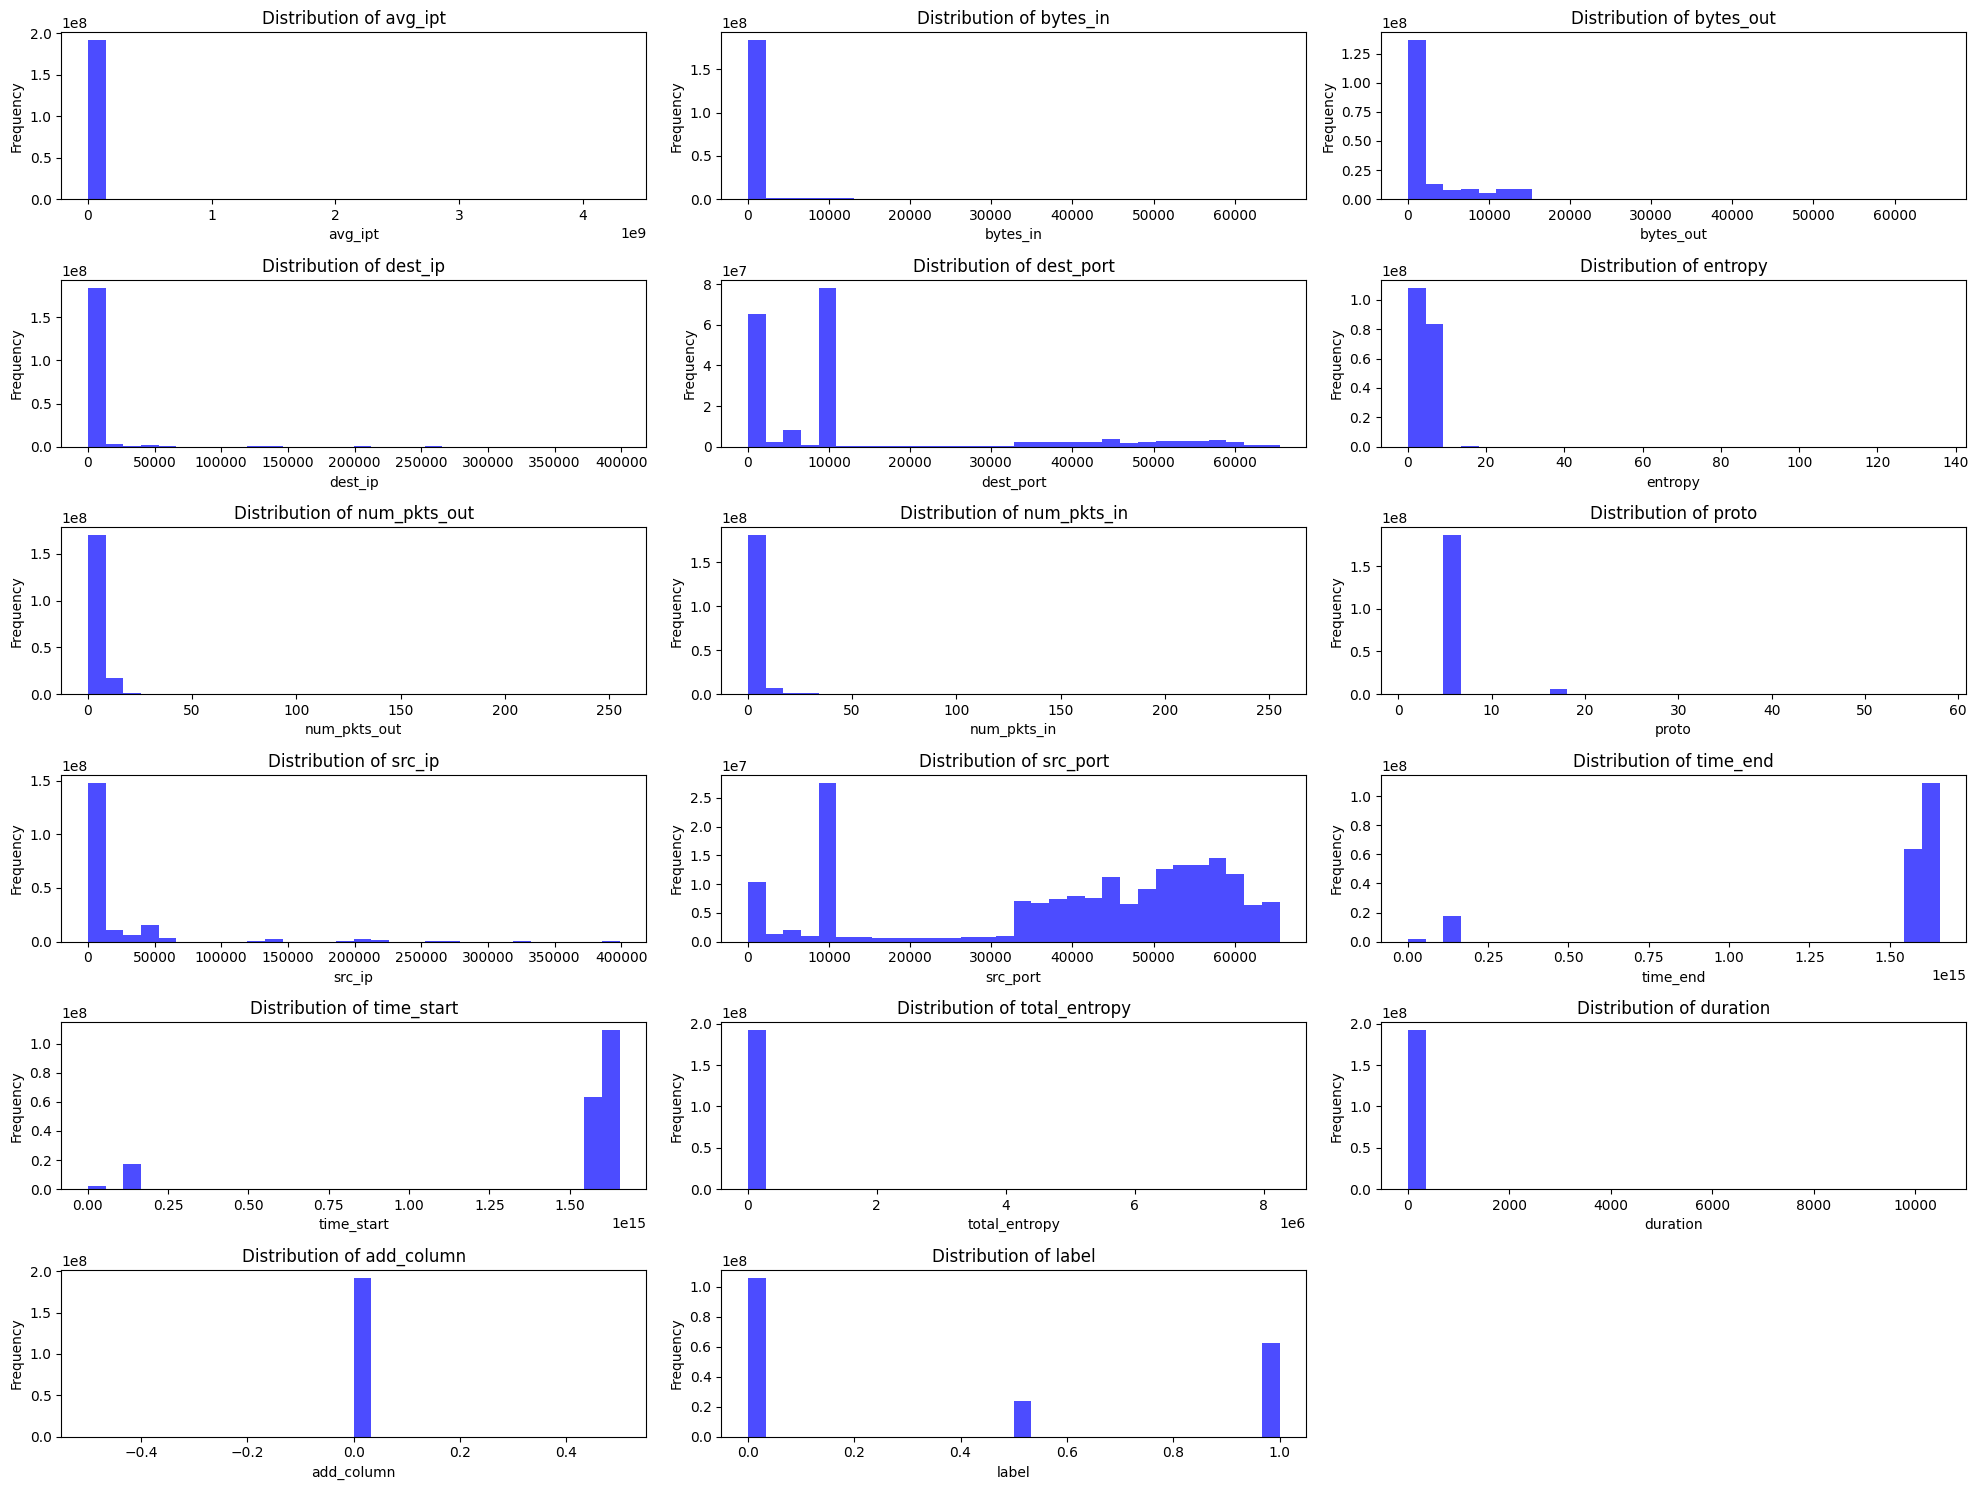

In [ ]:
# Plot histograms for all numerical columns
numerical_columns = fulldata.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(20, 15))
for i, column in enumerate(numerical_columns):
    plt.subplot(len(numerical_columns) // 3 + 1, 3, i + 1)
    plt.hist(fulldata[column], bins=30, color='blue', alpha=0.7)
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

In [ ]:
# Scatter Plot Example: Comparing two features to observe patterns
feature_x = 'feature1'  # Replace with the name of a numerical feature
feature_y = 'feature2'  # Replace with the name of another numerical feature

if feature_x in fulldata.columns and feature_y in fulldata.columns:
    plt.figure(figsize=(8, 6))
    plt.scatter(fulldata[feature_x], fulldata[feature_y], alpha=0.6, c='blue', edgecolors='w')
    plt.title(f'Scatter Plot of {feature_x} vs {feature_y}')
    plt.xlabel(feature_x)
    plt.ylabel(feature_y)
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print(f"Features {feature_x} and/or {feature_y} not found in dataset columns.")

Features feature1 and/or feature2 not found in dataset columns.


In [ ]:
# Compute the correlation matrix for numerical features
correlation_matrix = fulldata.corr()

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import time

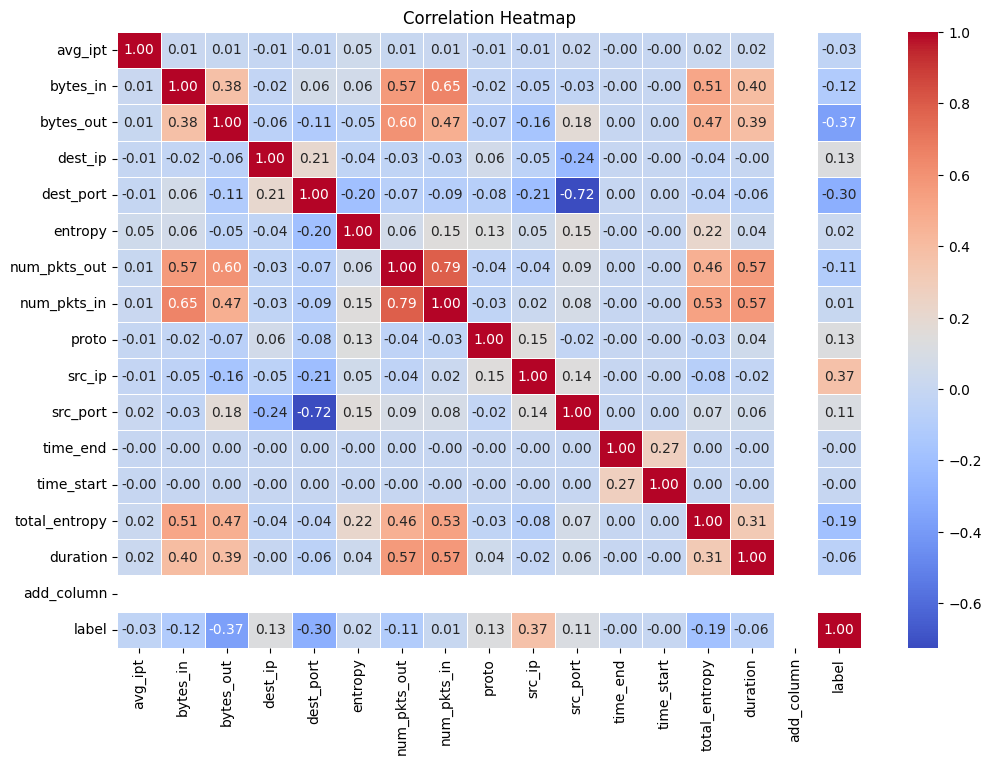

In [ ]:
# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt


In [2]:
import pandas as pd
fulldata = pd.read_csv('/content/drive/MyDrive/Datasets/full_dataset.csv')

In [4]:

fulldata.rename(columns={'duration': 'label1'}, inplace=True)
fulldata.rename(columns={'label': 'duration'}, inplace=True)
fulldata.rename(columns={'label1': 'label'}, inplace=True)

In [5]:
unique_labels = fulldata['label'].unique()
print(f"Unique values in 'label' column: {unique_labels}")

Unique values in 'label' column: [0.  0.5 1. ]


In [6]:
# Assuming the last column is the target variable
target_column = 'label'
X = fulldata.drop(columns=[target_column]).values
y = fulldata[target_column].values

# Encode target labels if they are categorical
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Standardize the feature values
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the Random Forest model
rf_model = RandomForestClassifier(n_estimators=10, random_state=42)

In [7]:
# Train the model with timing
import time
start_time = time.time()
rf_model.fit(X_train, y_train)
end_time = time.time()

# Calculate and display training time
training_time = end_time - start_time
print(f"Model training completed in {training_time:.2f} seconds.")


Model training completed in 14169.96 seconds.


In [8]:
# Make predictions
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

In [9]:
# Evaluate the model
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Train Accuracy: {train_accuracy * 100:.2f}%")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

print("\nClassification Report (Test Data):\n")
print(classification_report(y_test, y_test_pred))

Train Accuracy: 99.98%
Test Accuracy: 99.59%

Classification Report (Test Data):

              precision    recall  f1-score   support

           0       1.00      1.00      1.00  21216207
           1       0.98      0.98      0.98   4699292
           2       0.99      0.99      0.99  12524261

    accuracy                           1.00  38439760
   macro avg       0.99      0.99      0.99  38439760
weighted avg       1.00      1.00      1.00  38439760




Confusion Matrix:
[[21214292      498     1417]
 [     434  4615701    83157]
 [     868    70833 12452560]]


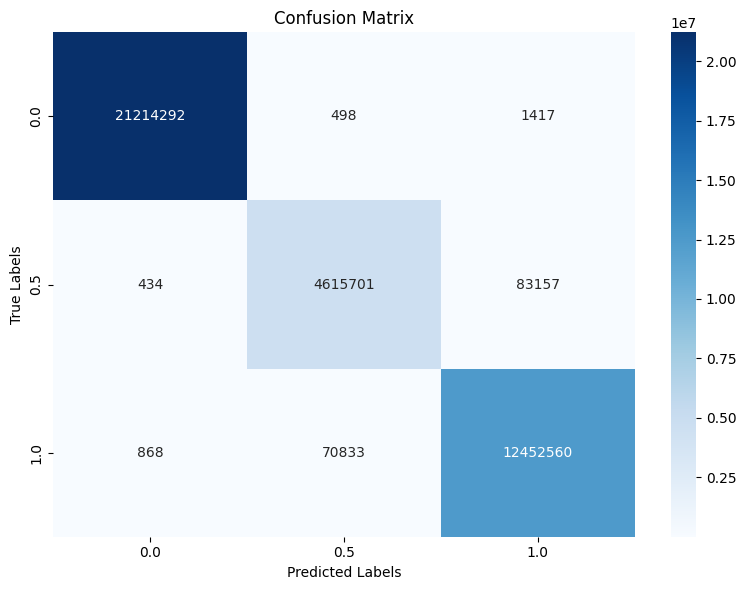

In [10]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Print the confusion matrix
print("\nConfusion Matrix:")
print(conf_matrix)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

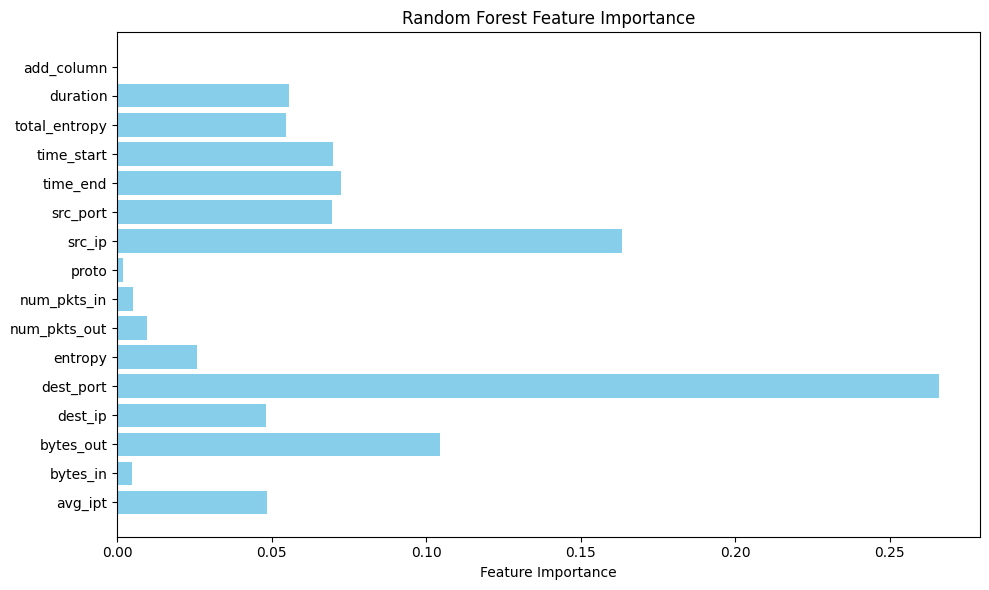

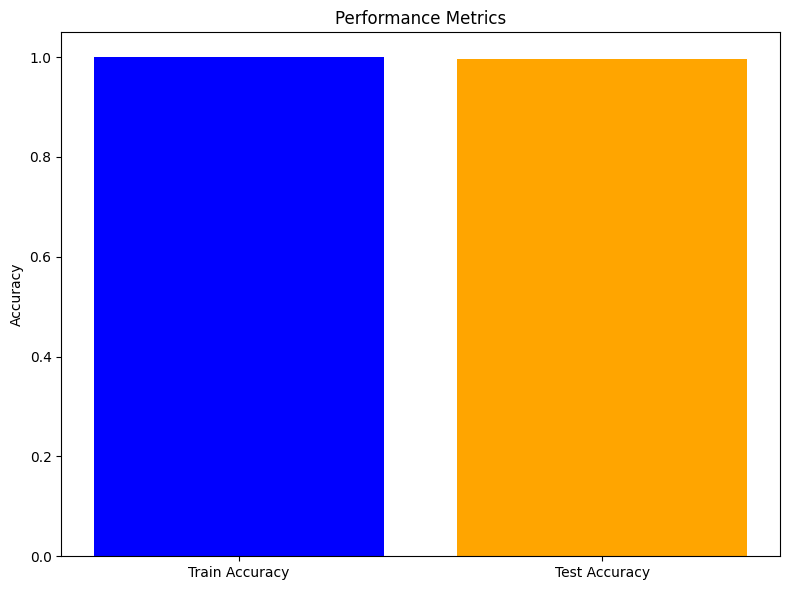

In [11]:
# Feature Importance
feature_importances = rf_model.feature_importances_
feature_names = fulldata.drop(columns=[target_column]).columns

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importances, color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importance')
plt.tight_layout()
plt.show()

# Display performance metrics as bar charts
metrics = ['Train Accuracy', 'Test Accuracy']
values = [train_accuracy, test_accuracy]

plt.figure(figsize=(8, 6))
plt.bar(metrics, values, color=['blue', 'orange'])
plt.title('Performance Metrics')
plt.ylabel('Accuracy')
plt.tight_layout()
plt.show()


True Positives (TP): 4615701
False Positives (FP): 498
False Negatives (FN): 434
True Negatives (TN): 21214292


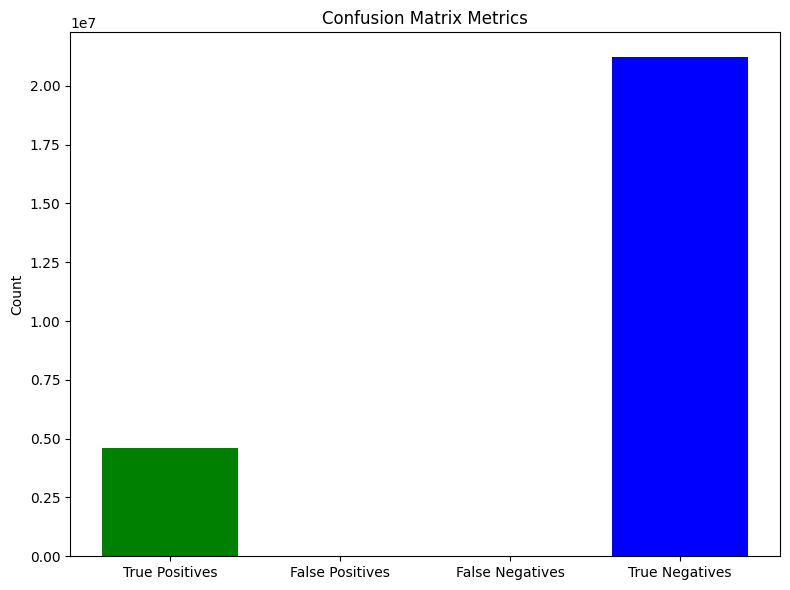

In [12]:
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Extract TP, FP, FN, and TN for binary classification
# For a binary classification problem, assume:
# - Class 0 is negative
# - Class 1 is positive

TP = conf_matrix[1, 1]  # True Positive: Correctly predicted positive cases
FP = conf_matrix[0, 1]  # False Positive: Incorrectly predicted as positive
FN = conf_matrix[1, 0]  # False Negative: Incorrectly predicted as negative
TN = conf_matrix[0, 0]  # True Negative: Correctly predicted negative cases

# Display the results
print(f"True Positives (TP): {TP}")
print(f"False Positives (FP): {FP}")
print(f"False Negatives (FN): {FN}")
print(f"True Negatives (TN): {TN}")

# Visualize the metrics
metrics = ['True Positives', 'False Positives', 'False Negatives', 'True Negatives']
values = [TP, FP, FN, TN]

plt.figure(figsize=(8, 6))
plt.bar(metrics, values, color=['green', 'red', 'orange', 'blue'])
plt.title('Confusion Matrix Metrics')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


In [13]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_test_pred, average='weighted')
recall = recall_score(y_test, y_test_pred, average='weighted')
f1 = f1_score(y_test, y_test_pred, average='weighted')

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")


Precision: 1.00
Recall: 1.00
F1-Score: 1.00


In [14]:
from sklearn.metrics import roc_curve, auc

y_test_prob = rf_model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()


ValueError: multiclass format is not supported

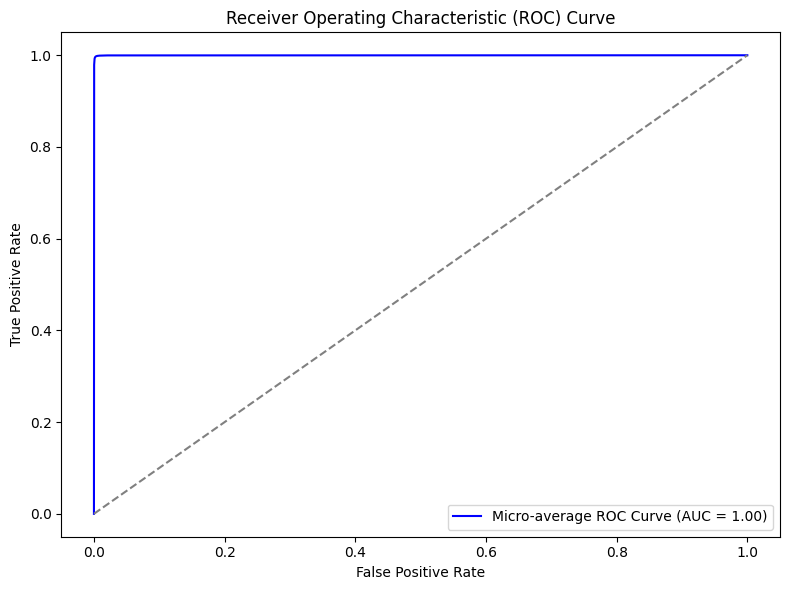

In [15]:
!pip install scikit-learn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier  # Import OneVsRestClassifier


# ... (your existing code for data loading, preprocessing, model training, etc.) ...

# Binarize the labels for multi-class ROC
n_classes = len(label_encoder.classes_)  # Get the number of classes
y_test_bin = label_binarize(y_test, classes=np.arange(n_classes))

# Use OneVsRestClassifier for multi-class ROC
classifier = OneVsRestClassifier(rf_model)  # Wrap your model with OvR
y_score = classifier.fit(X_train, y_train).predict_proba(X_test)  # Get probabilities

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot the micro-average ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr["micro"], tpr["micro"], color='blue', label=f'Micro-average ROC Curve (AUC = {roc_auc["micro"]:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [2]:
import pandas as pd
fulldata = pd.read_csv('/content/drive/MyDrive/Datasets/full_dataset.csv')

Unique values in 'label' column: [0.  0.5 1. ]
(192198797, 4, 4, 1)
[[[-0.04167832]
  [-0.19751279]
  [-0.47128948]
  [-0.13746269]]

 [[ 2.62132125]
  [-1.37908547]
  [-0.28062402]
  [-0.20670841]]

 [[-0.16122516]
  [-0.37573787]
  [-1.51820812]
  [ 0.30944666]]

 [[-2.96731932]
  [-0.27641799]
  [-0.18515947]
  [ 0.        ]]]


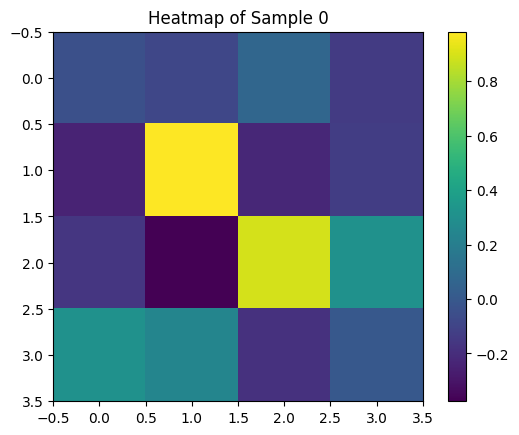

Epoch 1/5
3843976/3843976 [==============================] - 7603s 2ms/step - loss: 0.2611 - accuracy: 0.8834 - val_loss: 0.2406 - val_accuracy: 0.8840
Epoch 2/5
3843976/3843976 [==============================] - 7607s 2ms/step - loss: 0.2563 - accuracy: 0.8850 - val_loss: 0.2404 - val_accuracy: 0.8829
Epoch 3/5
3843976/3843976 [==============================] - 7621s 2ms/step - loss: 0.2559 - accuracy: 0.8851 - val_loss: 0.2392 - val_accuracy: 0.8829
Epoch 4/5
3843976/3843976 [==============================] - 7616s 2ms/step - loss: 0.2555 - accuracy: 0.8854 - val_loss: 0.2377 - val_accuracy: 0.8840
Epoch 5/5
1201243/1201243 [==============================] - 1570s 1ms/step - loss: 0.2403 - accuracy: 0.8849
Test Accuracy: 88.49%


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = 'cnn_model_checkpoint.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [3]:
fulldata.rename(columns={'duration': 'label1'}, inplace=True)
fulldata.rename(columns={'label': 'duration'}, inplace=True)
fulldata.rename(columns={'label1': 'label'}, inplace=True)

# View unique values in a specific column, e.g., 'label'
unique_labels = fulldata['label'].unique()
print(f"Unique values in 'label' column: {unique_labels}")



# Assuming the last column is the target variable
target_column = 'label'
X = fulldata.drop(columns=[target_column]).values
y = fulldata[target_column].values

# Encode target labels if they are categorical
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
y = to_categorical(y)

# Standardize the feature values
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Reshape X to match CNN input requirements (samples, height, width, channels)
# Assuming 16 features are reshaped into a 4x4 grid with 1 channel
X = X.reshape(-1, 4, 4, 1)


# Visualize the 2D Array with heatmap

print (X.shape)
print (X[14])

import matplotlib.pyplot as plt
plt.imshow(X[0].squeeze(), cmap='viridis')
plt.colorbar()
plt.title("Heatmap of Sample 0")
plt.show()


# Split the fulldata into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(4, 4, 1)),
    MaxPooling2D((2, 2)),
    Dropout(0.2),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(y.shape[1], activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Callback to save model weights during training
checkpoint = tf.keras.callbacks.ModelCheckpoint(
    'cnn_model_checkpoint.h5', save_weights_only=True, save_best_only=True, verbose=1
)


# Train the model
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Save the model
model.save('cnn_16_columns_model.h5')

# Load the model weights to resume training or evaluation
model.load_weights('cnn_model_checkpoint.h5')
print("Model weights loaded successfully.")

# Example for data generators (if used)
# Ensure the generator state can resume from the last epoch or batch
def data_generator(data, labels, batch_size):
    while True:
        for i in range(0, len(data), batch_size):
            yield data[i:i+batch_size], labels[i:i+batch_size]

# Initialize generator
train_gen = data_generator(X_train, y_train, batch_size=32)
model.fit(train_gen, epochs=10, steps_per_epoch=len(X_train) // 32)


# Plot performance metrics
plt.figure(figsize=(12, 5))

# Plot training and validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

from sklearn.metrics import confusion_matrix
import seaborn as sns

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Print the confusion matrix
print("\nConfusion Matrix:")
print(conf_matrix)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

In [4]:
# Example for data generators (if used)
# Ensure the generator state can resume from the last epoch or batch
def data_generator(data, labels, batch_size):
    while True:
        for i in range(0, len(data), batch_size):
            yield data[i:i+batch_size], labels[i:i+batch_size]

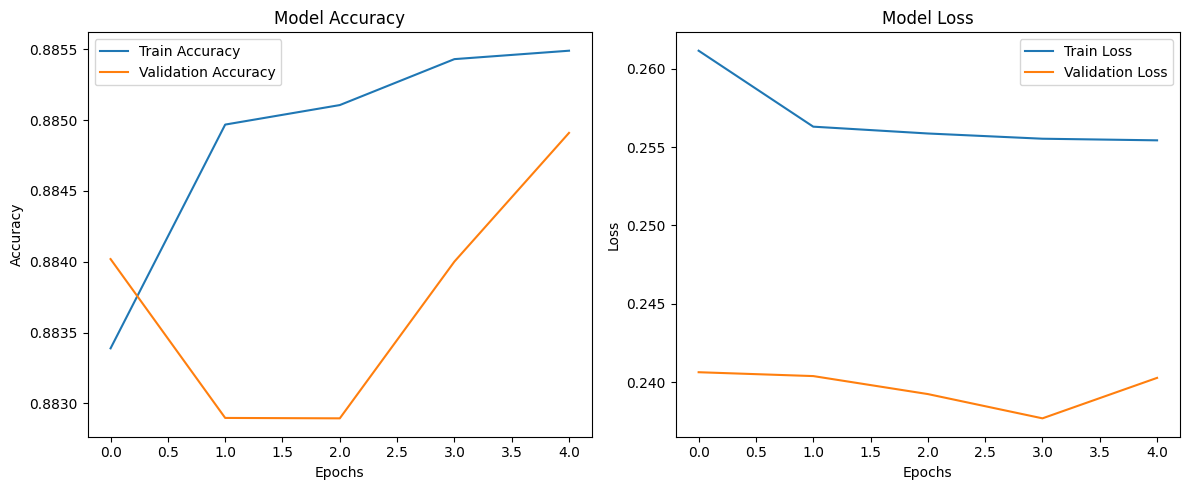

In [8]:
# Plot performance metrics
plt.figure(figsize=(12, 5))

# Plot training and validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

1201243/1201243 [==============================] - 1421s 1ms/step


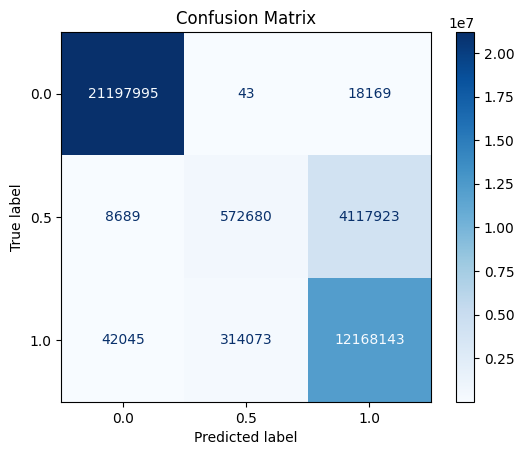

In [10]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Predict the classes for the test dataset
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class indices
y_true_classes = np.argmax(y_test, axis=1)  # True class indices

# Compute confusion matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=label_encoder.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix")
plt.show()